In [76]:
sys.path.append("..")
import os
import utils
import plot
import numpy as np
import pandas as pd

In [77]:
dir_path = "../"
relative_path = "results/50_simulations_no_vaccines_2021_05_27_18_58_21"
path = dir_path + relative_path
mdp_paths_path   =   f"{path}/mdp_paths.pkl"
mdp_reffs_path   =   f"{path}/mdp_reffs.pkl"
start_date_population_age_labels_path = f"{path}/start_date_population_age_labels.pkl"

paths = utils.create_named_tuple('paths', 'filepaths.txt')
config = utils.create_named_tuple('config', paths.config)

start_date, population, age_labels = utils.read_pickle(start_date_population_age_labels_path)
mdp_paths = utils.read_pickle(mdp_paths_path)
R_effs = utils.read_pickle(mdp_reffs_path)
mdp_path = mdp_paths[-1]
R_eff = R_effs[-1]

dates = []
final_deaths = np.zeros((len(mdp_paths),len(mdp_paths[0])))
final_infected = np.zeros((len(mdp_paths),len(mdp_paths[0])))
for i in range(len(mdp_paths)):
    for j in range(len(mdp_paths[0])):
        if i == 0:
            dates.append(mdp_paths[i][j].date.strftime('%d/%m/%Y'))
        final_deaths[i][j] = np.sum(mdp_paths[i][j].D)
        final_infected[i][j] = np.sum(mdp_paths[i][j].I)
    

In [78]:
final_deaths.shape

(50, 45)

In [79]:
deaths_mean = np.mean(final_deaths, axis=0)
deaths_mean_cumulative = np.cumsum(deaths_mean)
infected_mean = np.mean(final_infected, axis=0)
infected_mean_cumulative = np.cumsum(infected_mean)

In [80]:
deaths_mean_cumulative

array([0.00000000e+00, 5.12375257e-01, 1.16087508e+00, 1.87287626e+00,
       2.65517962e+00, 3.55136110e+00, 4.64469613e+00, 6.03001778e+00,
       7.80272582e+00, 1.00866148e+01, 1.30754794e+01, 1.69863151e+01,
       2.20935532e+01, 2.87676140e+01, 3.74262026e+01, 4.85666817e+01,
       6.28105426e+01, 8.07796801e+01, 1.03274223e+02, 1.31156645e+02,
       1.65343491e+02, 2.06816231e+02, 2.56472838e+02, 3.15076474e+02,
       3.83367016e+02, 4.62143148e+02, 5.51981166e+02, 6.53615282e+02,
       7.67987341e+02, 8.96029017e+02, 1.03854004e+03, 1.19662458e+03,
       1.37168649e+03, 1.56510726e+03, 1.77833644e+03, 2.01300243e+03,
       2.27075233e+03, 2.55310344e+03, 2.86148440e+03, 3.19749299e+03,
       3.56289596e+03, 3.95939704e+03, 4.38863061e+03, 4.85189225e+03,
       5.35041603e+03])

In [81]:
import matplotlib.pyplot as plt

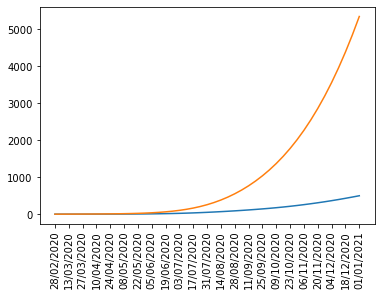

In [82]:
plt.plot(dates, deaths_mean, deaths_mean_cumulative)
plt.xticks(dates[::2], dates[::2], rotation='vertical')
plt.show()

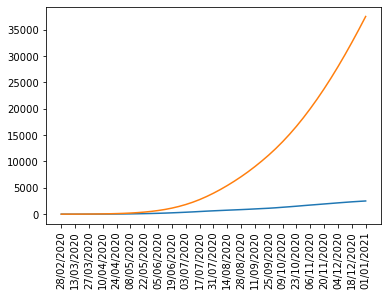

In [83]:
plt.plot(dates, infected_mean, infected_mean_cumulative)
plt.xticks(dates[::2], dates[::2], rotation='vertical')
plt.show()

In [75]:
infected_mean_cumulative[-1]

37499.32062355304

In [60]:
utils.get_average_results(final_states, population, age_labels, None)

NameError: name 'final_states' is not defined

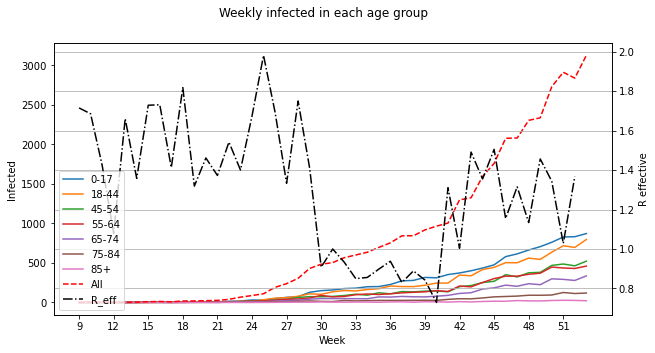

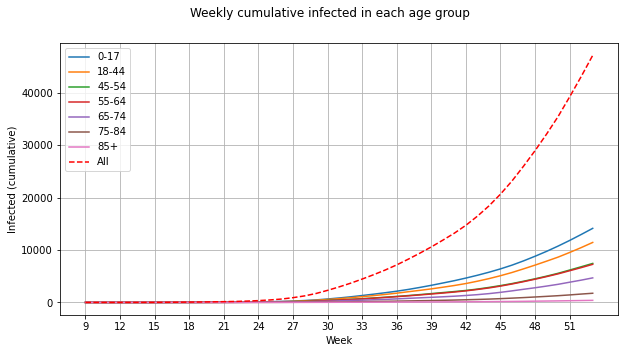

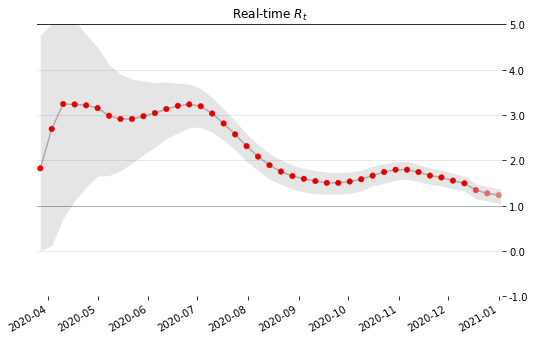

In [41]:
    history, new_infections = utils.transform_path_to_numpy(mdp_path)
    results_age = history.sum(axis=2)
    results_regions = history.sum(axis=3)
    infection_results_age = new_infections.sum(axis=1)
    infection_results_regions = new_infections.sum(axis=2)
    regions_to_plot = ['OSLO', 'TRONDHEIM', 'LØRENSKOG', 'STEINKJER']
    comps_to_plot = ["E2", "A", "I"]

    plot.age_group_infected_plot_weekly(results_age, start_date, age_labels, R_eff, include_R=True)
    plot.age_group_infected_plot_weekly_cumulative(infection_results_age, start_date, age_labels)
    utils.get_r_effective(mdp_path, population, config, from_data=False)
    #plot.seir_plot_weekly_several_regions(results_regions, start_date, comps_to_plot, regions_to_plot, paths.municipalities_names)
    #plot.infection_plot_weekly_several_regions(infection_results_regions, start_date, regions_to_plot, paths.municipalities_names)